# Додаткові завдання №2

## 1 Візуалізація емпіричної імовірності
Побудуйте графік залежності емпіричної імовірності випадіння герба (HEAD) від кількості підкидань чесної монети (симуляцій).

**Зауваження.** Завдання передбачає використання бібліотеки [Matplotlib](https://matplotlib.org/).

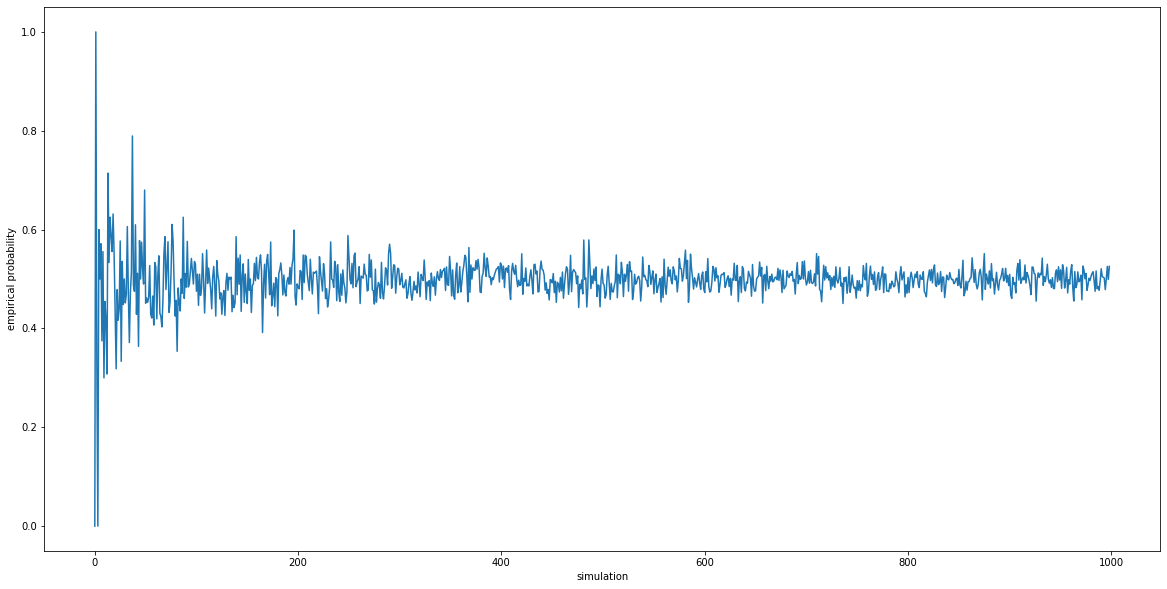

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

res = []

def task1(n):
    tosses=np.random.choice(["H","T"], size=n)
    heads = list(tosses).count("H")

    return heads/n

for i in range(1,1000):
    res.append(task1(i))

plt.plot(res)
plt.ylabel('empirical probability')
plt.xlabel('simulation')
plt.show()

## 2 Найбільше число
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що максимальне число після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $x\_max$, для таких параметрів:
- $f = \{ 2, 5, 8 \}, x\_max = 8$
- $f = \{ 3, 4 \}, x\_max = 2$
- $f = \{ 2, 5, 7, 3 \}, x\_max = 3$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \max\limits_{1 \leq i \leq n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = x\_max \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 8, 3 \}$ вводиться $x\_max < 1$ або $x\_max > 8$.

In [15]:
from itertools import product

f = [[2,5,8],[3,4],[2,5,7,3]]
x_max = [8,2,3]

def comb(k, n):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n-k))

def t_prob3(x_max, f):
    if x_max < 1 or x_max > max(f):
        return 0
    res = 0
    pw = list(product(range(2), repeat=len(f)))[1:]
    l_1 = [1/num if num >= x_max else 0 for num in f]
    l_2 = [1 if num < x_max else (x_max - 1)/num for num in f]
    for pr in pw:
        val = 1
        for i in range(len(f)):
            val *= l_1[i]**pr[i]*l_2[i]**(1 - pr[i])
        res += val
    return res

def task3(x_max, f):
    if x_max < 1 or x_max > max(f):
        return 0
    counter = 0
    for i in range(10000):
        x = []
        for l in f:
            x.append(np.random.choice(range(1,l+1), size=1))
        if max(x) == x_max:
            counter += 1
    return counter/10000

for i in range(3):
    print(f'Теоретична  імовірность -- {t_prob3(x_max[i], f[i])}')
    print(f'Емпірична імовірность для x_max = {x_max[i]} і f = {f[i]} -- {task3(x_max[i],f[i])}')
    print('\n')

Теоретична  імовірность -- 0.125
Емпірична імовірность для x_max = 8 і f = [2, 5, 8] -- 0.1214


Теоретична  імовірность -- 0.25
Емпірична імовірность для x_max = 2 і f = [3, 4] -- 0.2436


Теоретична  імовірность -- 0.18095238095238092
Емпірична імовірность для x_max = 3 і f = [2, 5, 7, 3] -- 0.1828




## 3 Сума чисел
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що сума чисел після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $s$, для таких параметрів:
- $f = \{ 3, 4, 5 \}, s = 13$
- $f = \{ 2, 2 \}, s = 3$
- $f = \{ 3, 4, 5 \}, s = 7$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \sum\limits_{i = 1}^{n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = s \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 6, 3 \}$ вводиться $s < 3$ або $s > 13$.

In [56]:
f = [[3,4,5],[2,2],[3,4,5]]
s = [13,3,7]

def task4(s,f):
    if s < 1*min(f) or s > sum(f):
        return 0
    counter = 0
    for i in range(10000):
        x = []
        for l in f:
            x.append(np.random.choice(range(1,l+1), size=1))
        if sum(x) == s:
            counter += 1
    return counter/10000

def r(s, mtr):
    if len(mtr.shape) == 1:
        for i in range(len(mtr)):
            mtr[i] = s + i + 1
    else:
        for i in range(mtr.shape[0]):
            r(i+s+1,mtr[i])
     

def t_prob4(s, f):
    if s < 1*min(f) or s > sum(f):
        return 0
    mtr = np.zeros(f)
    r(0, mtr)
    return (mtr == s).sum()/np.prod(f)

     

for i in range(3):
    print(f'Теоретична  імовірность -- {t_prob4(s[i], f[i])}')
    print(f'Емпірична імовірность для sum = {s[i]} і f = {f[i]} -- {task4(s[i],f[i])}')
    print('\n')



Теоретична  імовірность -- 0
Емпірична імовірность для sum = 13 і f = [3, 4, 5] -- 0


Теоретична  імовірность -- 0.5
Емпірична імовірность для sum = 3 і f = [2, 2] -- 0.4932


Теоретична  імовірность -- 0.18333333333333332
Емпірична імовірность для sum = 7 і f = [3, 4, 5] -- 0.185


